In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from matplotlib.colors import ListedColormap
%matplotlib inline

In [46]:
neighbors = KNeighborsClassifier(n_neighbors=5)
iris = load_iris()
iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [47]:
X = iris[['sepal length (cm)',  'petal width (cm)']]
Y = iris.target
neighbors.fit(X,Y)

neighbors.predict([[24, 190]])
print(neighbors.predict_proba([[24, 190]]))

[[0. 0. 1.]]


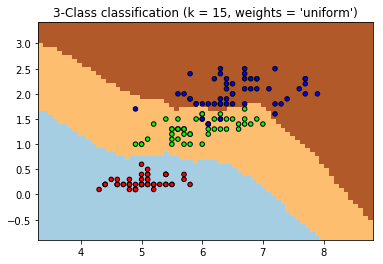

In [52]:
X = np.array(X)
y = np.array(Y)
n_neighbors = 15
h = 0.08

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))
Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6, 4))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

    # Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()